Importing Libraries

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

random_state = 2026

In [2]:

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()





,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Exploratory Data Analysis


Univariate

In [7]:
def plot_bar_with_labels(series, title="", xlabel="", ylabel=""):
    """
    Plots a bar chart from a pandas Series and adds value labels on top of each bar.

    Parameters:
        series (pd.Series): The data to plot (e.g., value_counts()).
        title (str): Title of the chart.
        xlabel (str): Label for x-axis.
        ylabel (str): Label for y-axis.
    """
    ax = series.plot(kind='bar', title=title, xlabel=xlabel, ylabel=ylabel, rot=0)

    # Add labels on top of each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')  # center align horizontally, place above the bar

    plt.show()


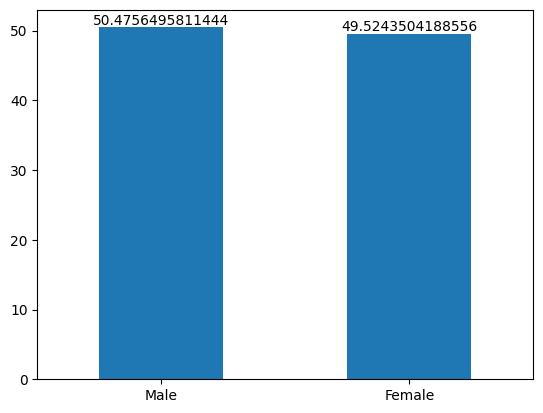

,proportion
gender,
Male,50.47565
Female,49.52435


In [8]:
gender_sum = df['gender'].value_counts(normalize=True) * 100
plot_bar_with_labels(gender_sum)
gender_sum

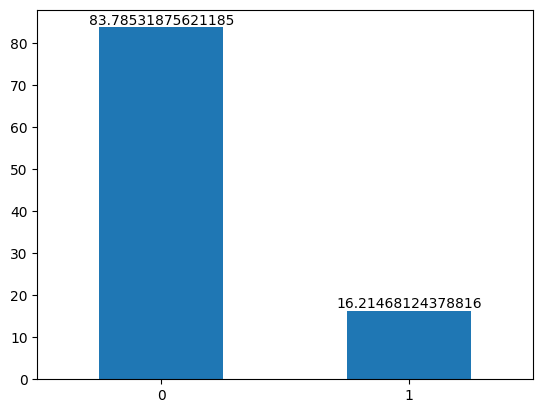

,proportion
SeniorCitizen,
0,83.785319
1,16.214681


In [9]:
sernior_sum = df['SeniorCitizen'].value_counts(normalize=True) * 100
plot_bar_with_labels(sernior_sum)
sernior_sum

In [10]:
yes_no_df = df[['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']].apply(pd.Series.value_counts)

yes_no_df

,Partner,Dependents,PhoneService,PaperlessBilling
No,3641,4933,682,2872
Yes,3402,2110,6361,4171


In [11]:
# Yes, No, No Internet Service
yes_no_none_df = df[[ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].apply(pd.Series.value_counts)
yes_no_none_df



,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
No,3498,3088,3095,3473,2810,2785
Yes,2019,2429,2422,2044,2707,2732
No internet service,1526,1526,1526,1526,1526,1526


In [12]:
yes_no_multiple_df = df['MultipleLines'].value_counts(normalize=True) * 100
yes_no_multiple_df = pd.DataFrame(yes_no_multiple_df)
yes_no_multiple_df

,proportion
MultipleLines,
No,48.132898
Yes,42.183729
No phone service,9.683374


In [13]:
df['PaymentMethod'].value_counts(normalize=True) * 100


,proportion
PaymentMethod,
Electronic check,33.579441
Mailed check,22.887974
Bank transfer (automatic),21.922476
Credit card (automatic),21.610109


In [14]:
df['Contract'].value_counts(normalize=True) * 100

,proportion
Contract,
Month-to-month,55.019168
Two year,24.066449
One year,20.914383


In [15]:
df['InternetService'].value_counts(normalize=True) * 100

,proportion
InternetService,
Fiber optic,43.958540
DSL,34.374556
No,21.666903


In [16]:
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,73.463013
Yes,26.536987


In [17]:
def plot_distribution(series, title="", xlabel=""):
  plt.hist(series)
  plt.title(f"{title} Distribution")
  plt.xlabel(xlabel)
  plt.ylabel("Number of Customers")
  plt.show()


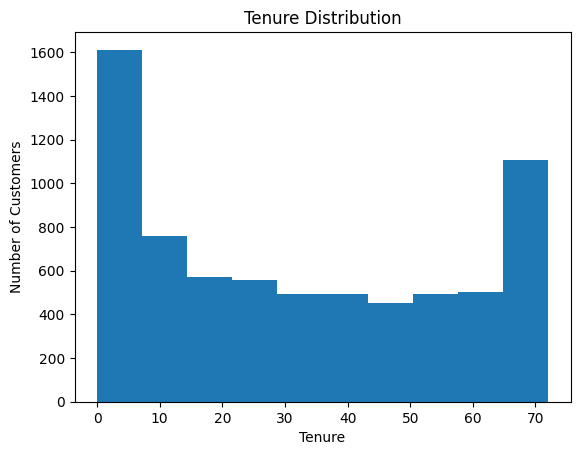

In [18]:
plot_distribution(series=df['tenure'], title="Tenure", xlabel= "Tenure")

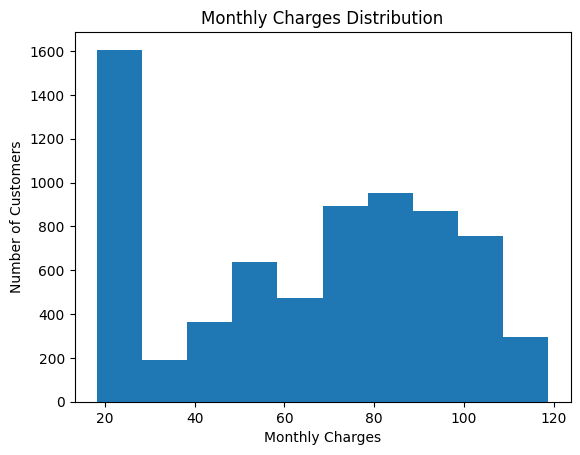

In [19]:
plot_distribution(series=df['MonthlyCharges'], title="Monthly Charges", xlabel= "Monthly Charges")

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


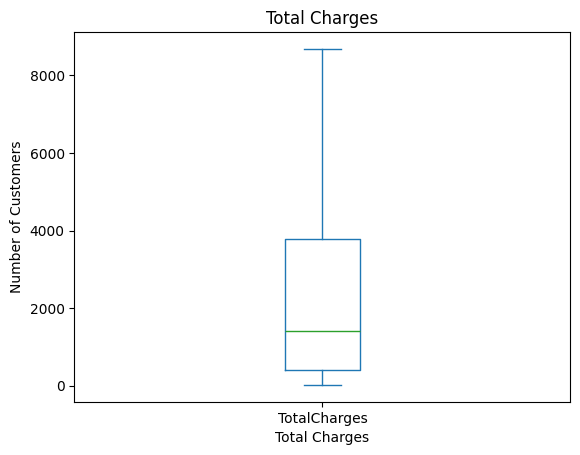

In [20]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].plot(kind="box", title="Total Charges", xlabel="Total Charges", ylabel="Number of Customers")
#plot_distribution(series=df['TotalCharges'], title="Total Charges", xlabel= "Total Charges")
df['TotalCharges'].describe()

Multivariate

In [21]:

def plot_bar_with_labels(series, title="", xlabel="", ylabel=""):
    """
    Plots a bar chart from a pandas Series (single or MultiIndex) and adds value labels.

    Parameters:
        series (pd.Series): Data to plot, can be value_counts() or groupby().value_counts()
        title (str): Chart title
        xlabel (str): Label for x-axis
        ylabel (str): Label for y-axis
    """

    ax = series.plot(kind='bar', title=title, rot=45)
    # Format x-axis labels for MultiIndex
    if isinstance(series.index, pd.MultiIndex):
        ax.set_xticklabels([' & '.join(map(str, idx)) for idx in series.index])

    # Add labels on top of each bar
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


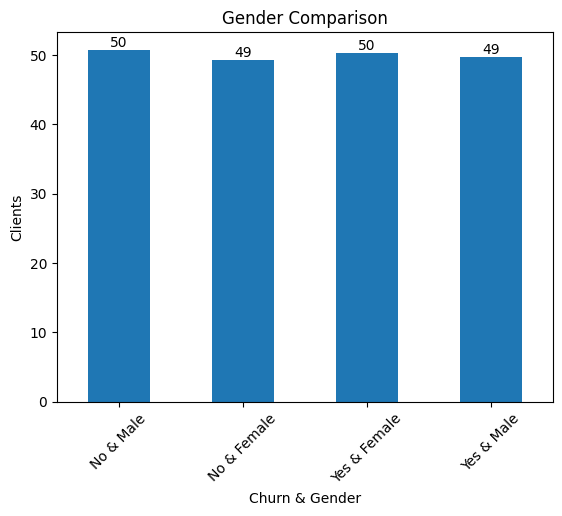

In [22]:
# Barchart for categories
# Histogram, boxplot for numeric distributions
# Scatter Plot to see correlation between 2 variables
# Gender
gender_sum = df.groupby('Churn')['gender'].value_counts(normalize=True) * 100
plot_bar_with_labels(gender_sum, title='Gender Comparison', xlabel="Churn & Gender", ylabel='Clients')


Gender doesn't seem to be a great predictive factor on whether customers churned or not as the factors are pretty even

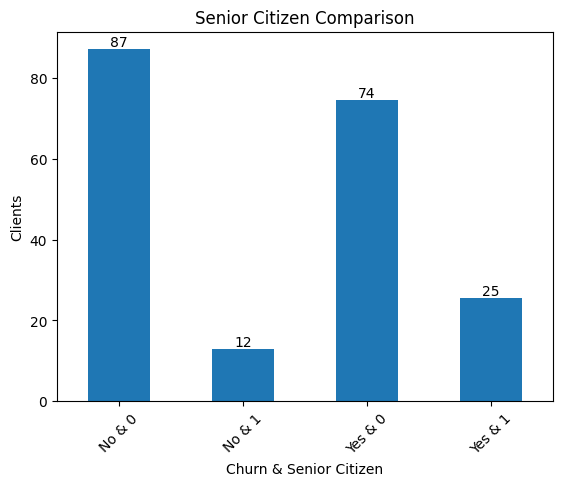

In [23]:
senior_sum = df.groupby('Churn')['SeniorCitizen'].value_counts(normalize=True) * 100
plot_bar_with_labels(senior_sum, title='Senior Citizen Comparison', xlabel="Churn & Senior Citizen", ylabel='Clients')

There's little difference between senior ciizen and rest. However, it should be noted that being a senior citizen has a higher chance of causing churn

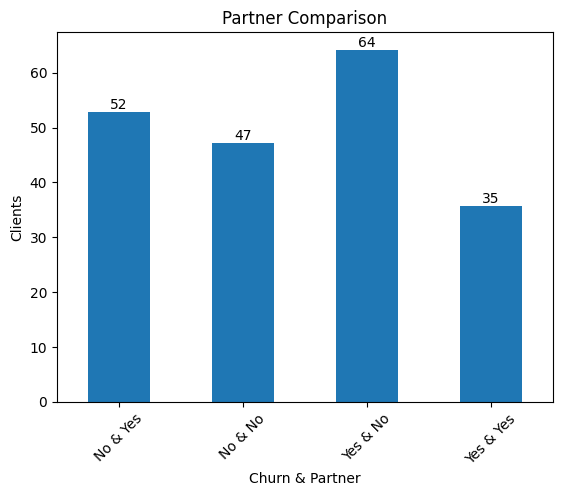

In [24]:
partner_df = df.groupby('Churn')['Partner'].value_counts(normalize=True) * 100
plot_bar_with_labels(partner_df, title='Partner Comparison', xlabel="Churn & Partner", ylabel='Clients')

Churned partners are more likely to be single

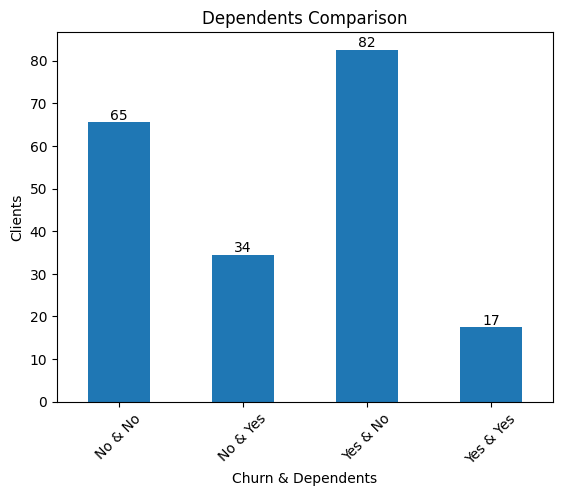

In [25]:
dependents_df = df.groupby('Churn')['Dependents'].value_counts(normalize=True) * 100
plot_bar_with_labels(dependents_df, title='Dependents Comparison', xlabel="Churn & Dependents", ylabel='Clients')

Churned customers are more likely to be not have dependents than customers who stayed as there is a 17% difference between the graphs

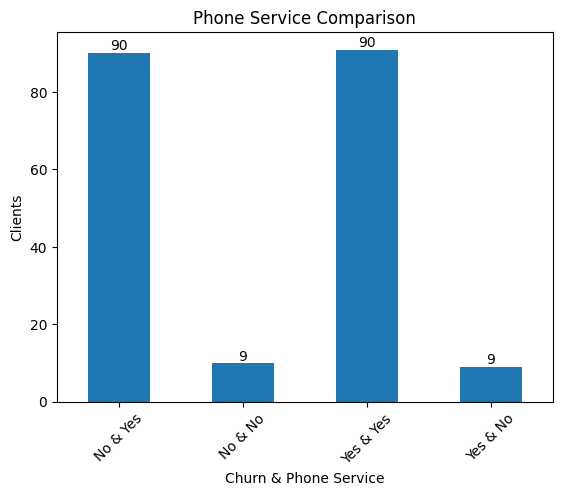

In [26]:
phone_df = df.groupby('Churn')['PhoneService'].value_counts(normalize=True) *100
plot_bar_with_labels(phone_df, title='Phone Service Comparison', xlabel="Churn & Phone Service", ylabel='Clients')


There does not seem to be any difference between those who stayed and those who left regarding phone service. Thus it may be an independent variable from Churn

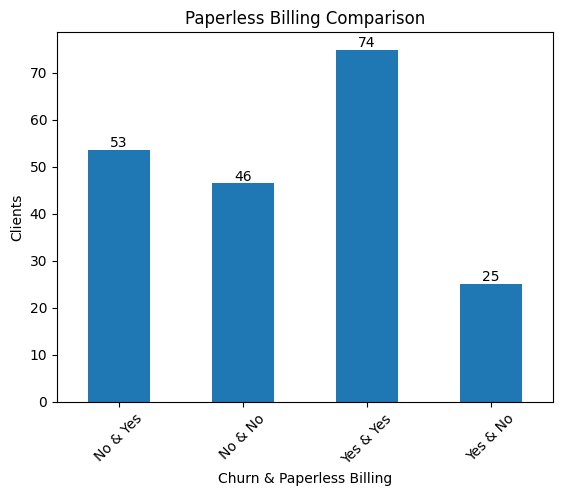

In [27]:
paperless_df = df.groupby('Churn')['PaperlessBilling'].value_counts(normalize=True) * 100
plot_bar_with_labels(paperless_df, title='Paperless Billing Comparison', xlabel="Churn & Paperless Billing", ylabel='Clients')
#

Customers with paperlesss billing are more likely to churn

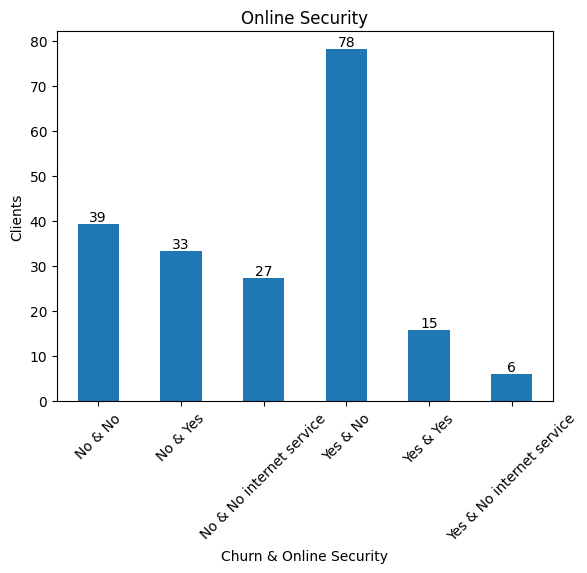

In [28]:
plot_bar_with_labels(df.groupby('Churn')['OnlineSecurity'].value_counts(normalize=True)*100, "Online Security", "Churn & Online Security", "Clients")

Customers who churned are more likely to not have online seccurity

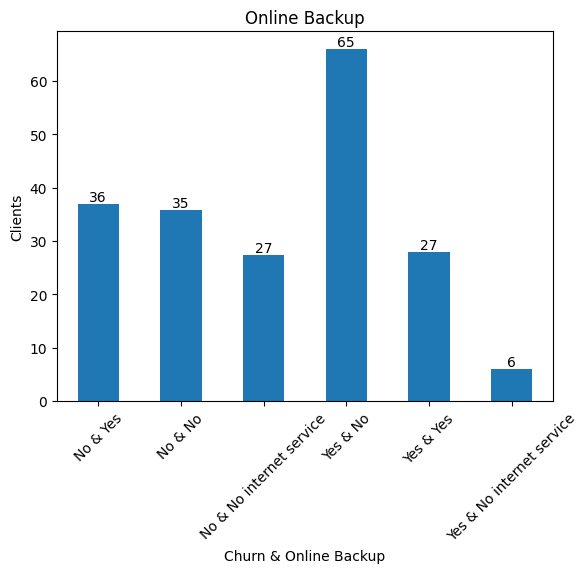

In [29]:
plot_bar_with_labels(df.groupby('Churn')['OnlineBackup'].value_counts(normalize=True)*100, "Online Backup", "Churn & Online Backup", "Clients")


Customers who churned are more likely to not have online backup

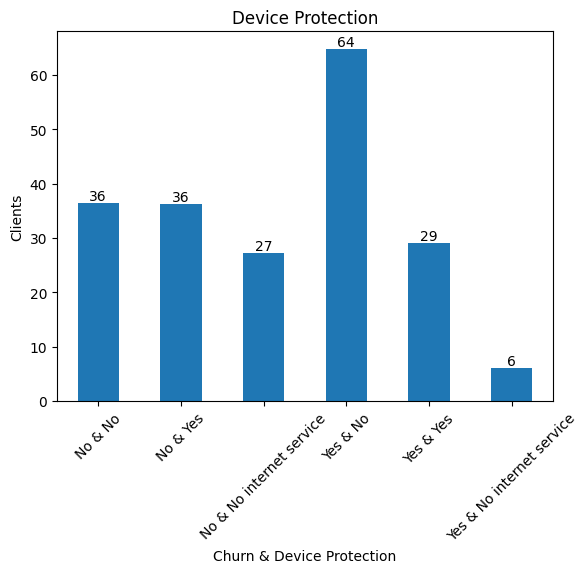

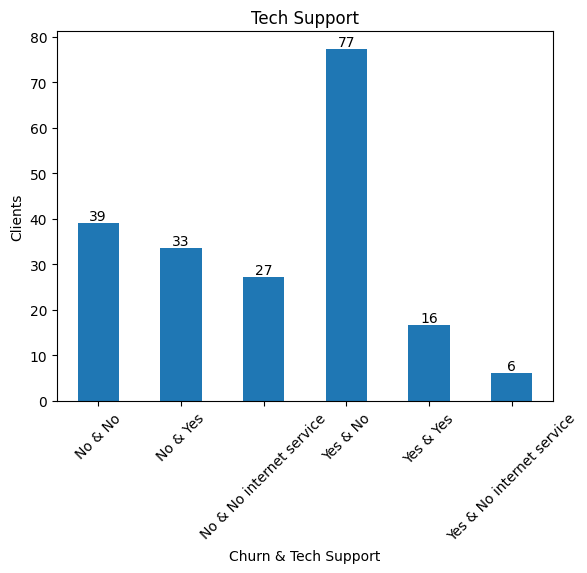

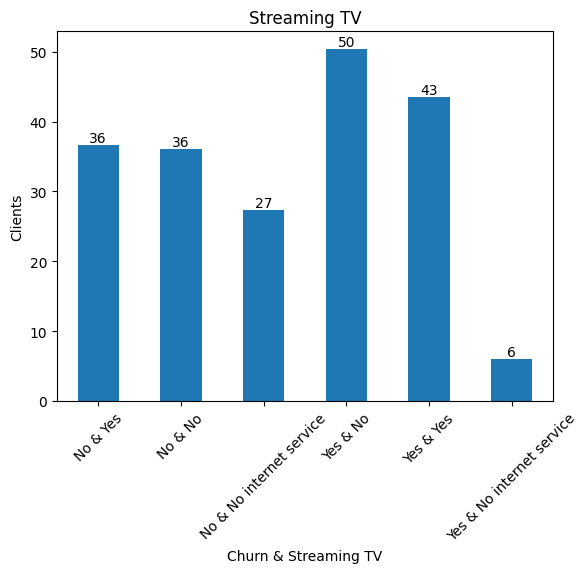

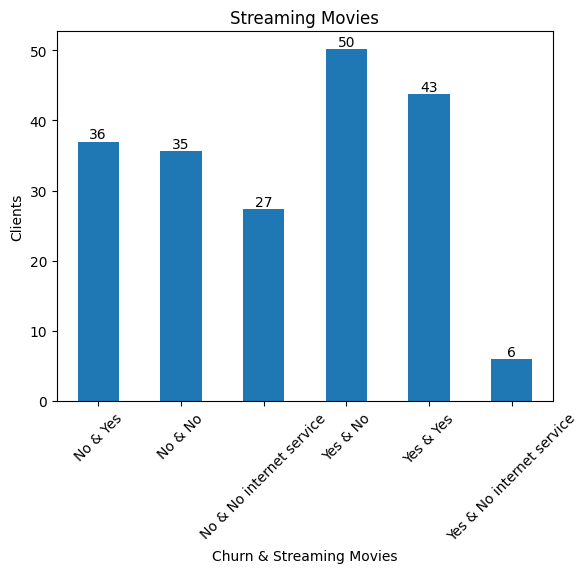

In [30]:
plot_bar_with_labels(df.groupby('Churn')['DeviceProtection'].value_counts(normalize=True)*100, "Device Protection", "Churn & Device Protection", "Clients")
plot_bar_with_labels(df.groupby('Churn')['TechSupport'].value_counts(normalize=True)*100, "Tech Support", "Churn & Tech Support", "Clients")
plot_bar_with_labels(df.groupby('Churn')['StreamingTV'].value_counts(normalize=True)*100, "Streaming TV", "Churn & Streaming TV", "Clients")
plot_bar_with_labels(df.groupby('Churn')['StreamingMovies'].value_counts(normalize=True)*100, "Streaming Movies", "Churn & Streaming Movies", "Clients")

Based on the above not having any of the services seems to be linked to churn. Though Streaming TV and Streaming Movies seem to be linked and also seem to be more balanced. Therefore, they're less likely to be predictive factors

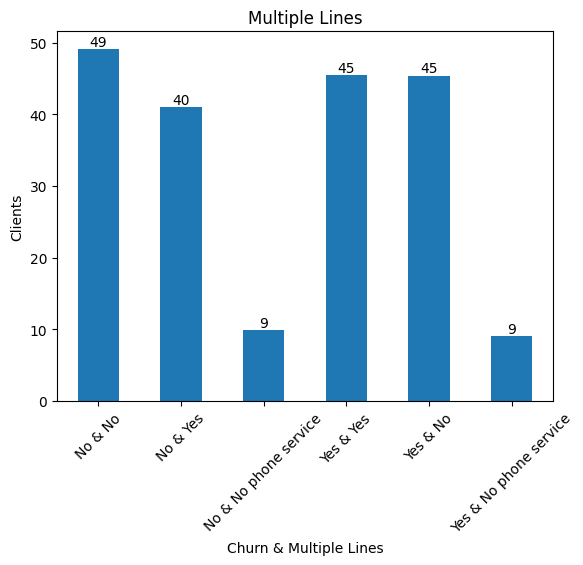

In [31]:
plot_bar_with_labels(df.groupby('Churn')['MultipleLines'].value_counts(normalize=True)*100, "Multiple Lines", "Churn & Multiple Lines", "Clients")

Having multiple lines doesn't seem to have any effect on Churn.

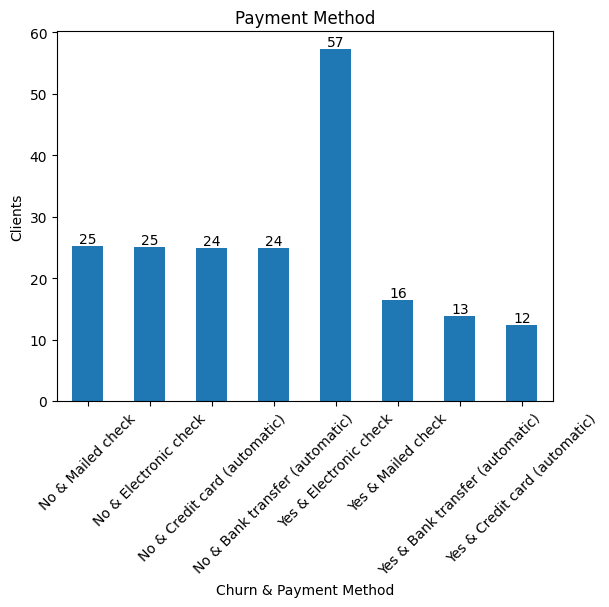

In [32]:
plot_bar_with_labels(df.groupby('Churn')['PaymentMethod'].value_counts(normalize=True)*100, "Payment Method", "Churn & Payment Method", "Clients")

Customers who left seem to be more likely to have had their payment method as an Electronic Check

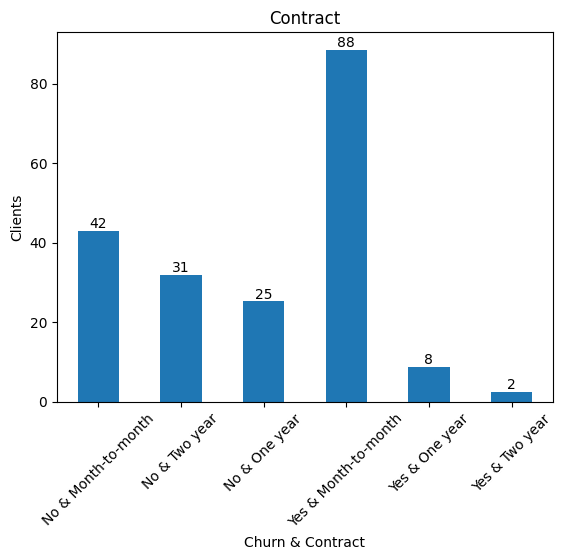

In [33]:
plot_bar_with_labels(df.groupby('Churn')['Contract'].value_counts(normalize=True)*100, "Contract", "Churn & Contract", "Clients")

Clients who pay month-to-month are more likely to leave. Perhaps this is due to not having to commit long-term

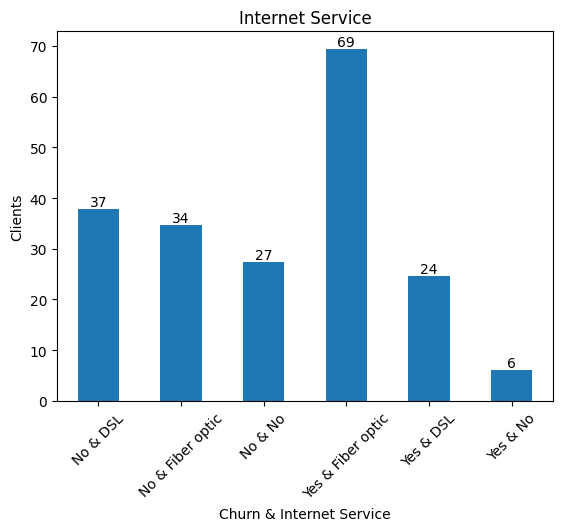

In [34]:
plot_bar_with_labels(df.groupby('Churn')['InternetService'].value_counts(normalize=True)*100, "Internet Service", "Churn & Internet Service", "Clients")

Clients who leave are more likely to have a Fiber Optic Internet Service

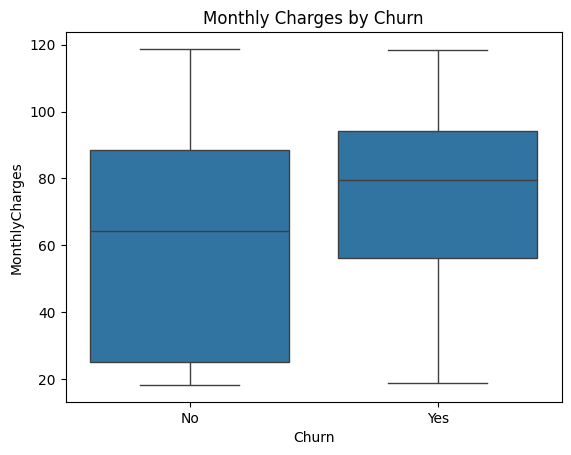

In [35]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

Customers who churn seem to have a higher monthly charge than customers who don't

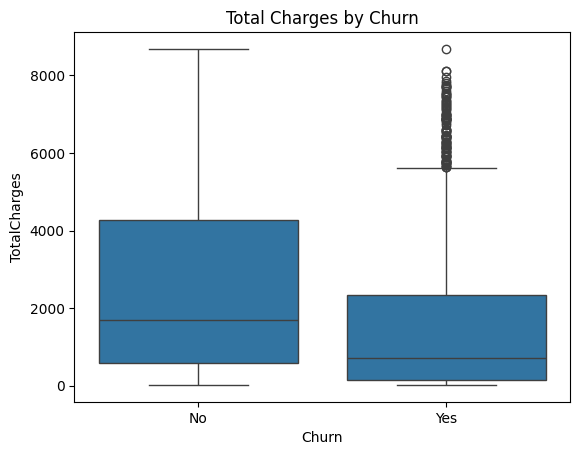

In [36]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges by Churn')
plt.show()

Customers who have a lower total charge may churn. However, it should be noted that there are many outliers

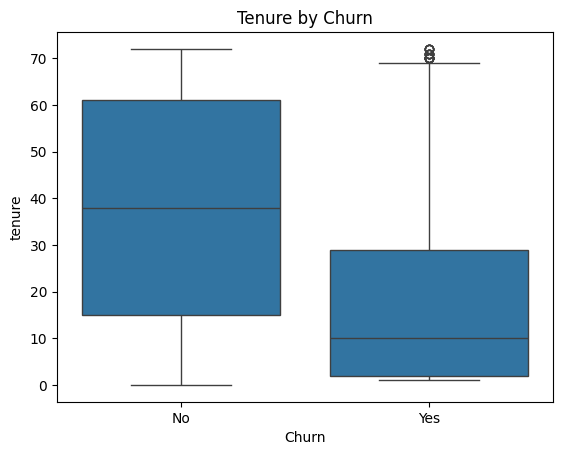

In [37]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn')
plt.show()

Most of the time, it seems that Churned customers tend to leave early on within 30 months (2 years and a half). Thought the average would be at about 10 months.

In [38]:
churn = df.loc[df["Churn"]=="Yes"]
not_churn = df.loc[df["Churn"]=="No"]
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


Training Model

In [39]:
# Categorical
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
# Ordinal Encoding
ordinal_features = ['Contract']
contract_order = ['Month-to-month', 'One year', 'Two year']
# Numerical Features
numerical_features = ['tenure', "MonthlyCharges", "TotalCharges"]


# Cleaning up variables
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Setting up training/testing data
y = df["Churn"].map({"Yes" : 1, "No" : 0})
X = df.drop(columns=["Churn"])


# Setting up Pipeline

numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
ordinal_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("encoder", OrdinalEncoder(categories=[contract_order]))])
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features),
    ("ord", ordinal_transformer, ordinal_features)
])

# Testing different models
models = {"Logistic Regression": LogisticRegression(max_iter=1000, random_state=random_state),
          "Random Forest": RandomForestClassifier(n_estimators=300, random_state=random_state),
          "XGBoost": XGBClassifier(random_state=random_state, eval_metric = "logloss")}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

for name, model in models.items():
  pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
  scores = cross_val_score(pipe, X, y, cv=cv, scoring="roc_auc")
  print(f"{name} mean CV ROC-AUC: {scores.mean()}")




Logistic Regression mean CV ROC-AUC: 0.8453755925602678
Random Forest mean CV ROC-AUC: 0.8210995735122026
XGBoost mean CV ROC-AUC: 0.8218545270764558


Logistic Regression, on average, has a higher CV ROC-AUC

In [40]:
# Choosing the best model
best_model = LogisticRegression(max_iter=1000, random_state=random_state)
pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", best_model)])
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
y_prob = pipe.predict_proba(x_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:",roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1027
           1       0.72      0.57      0.64       382

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.76      1409
weighted avg       0.82      0.82      0.82      1409

ROC-AUC Score: 0.8653858898739275


What features are most important?

In [41]:
coef = pipe.named_steps['classifier'].coef_[0]
feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()

importance = pd.Series(coef, index=feature_names)
importance.sort_values(ascending=False)

,0
num__TotalCharges,0.640604
cat__InternetService_Fiber optic,0.456444
cat__PaymentMethod_Electronic check,0.206361
cat__TechSupport_No,0.156921
cat__OnlineSecurity_No,0.153262
cat__StreamingMovies_Yes,0.149289
cat__StreamingTV_Yes,0.143538
cat__OnlineBackup_No,0.075694
cat__MultipleLines_Yes,0.071212
cat__Contract_Month-to-month,0.062052


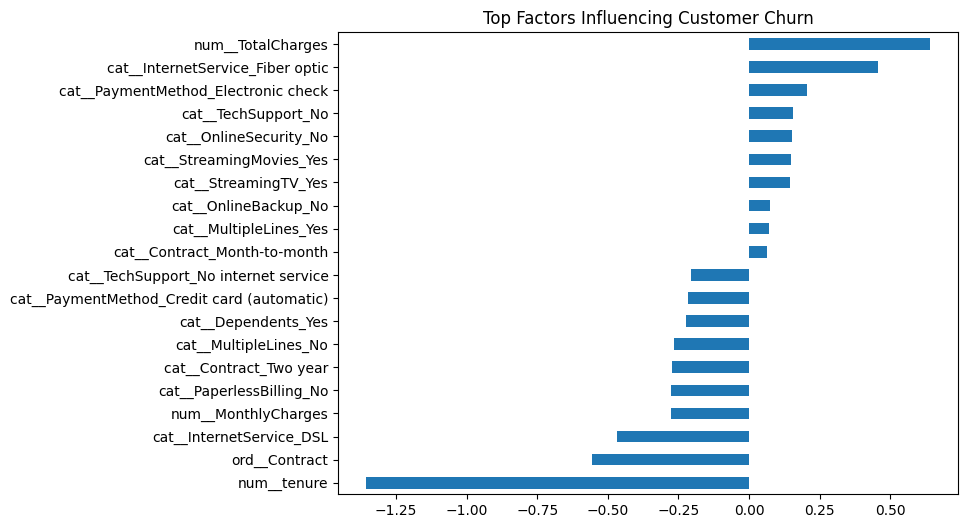

In [42]:
importance = pd.Series(coef, index=feature_names)
top = importance.sort_values().tail(10)
bottom = importance.sort_values().head(10)

pd.concat([bottom, top]).plot(kind="barh", figsize=(8,6))
plt.title("Top Factors Influencing Customer Churn")
plt.show()


The strongest churn risk factors are TotalCharges, Fiber Optic Internet Service, Electronic Check Payment, No Tech Support, and No Online Security